In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import pandas as pd

from scipy.cluster.vq import kmeans, vq, whiten

import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv("comic_con.csv")
df[:3]

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000


**Scaled X-Coordinates and Y-Coordinates of Ticket Stalls**

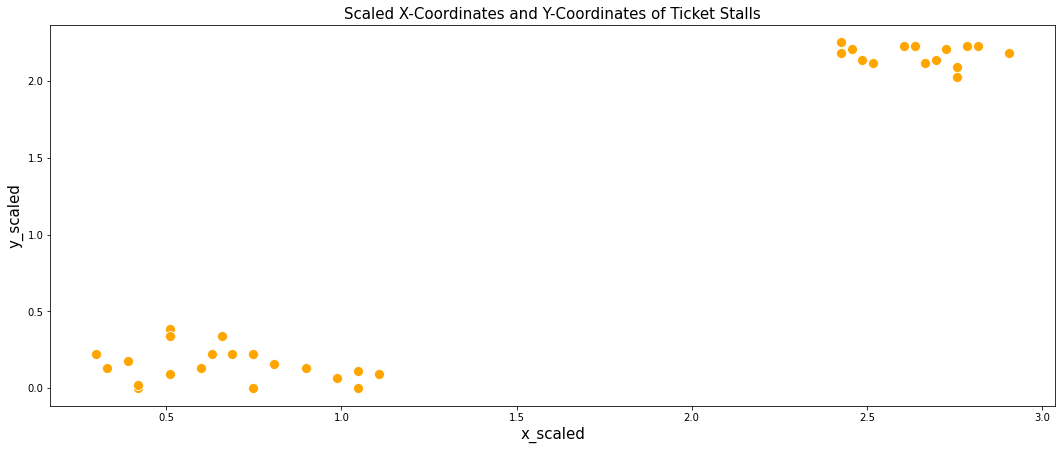

In [4]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled", 
                y = "y_scaled",
                data = df,
                s = 100,
                color = "orange")
plt.title("Scaled X-Coordinates and Y-Coordinates of Ticket Stalls", size = 15)
plt.xlabel("x_scaled", size = 15)
plt.ylabel("y_scaled", size = 15)
plt.show()

### Basics of K-Means Clustering

In [5]:
# Generate Cluster Centers
cluster_centers, _ = kmeans(df[["x_scaled", "y_scaled"]], 3)

# Generate Cluster Labels
df["cluster_labels"], _ = vq(df[["x_scaled", "y_scaled"]],
                             cluster_centers)

**Plot Clusters**

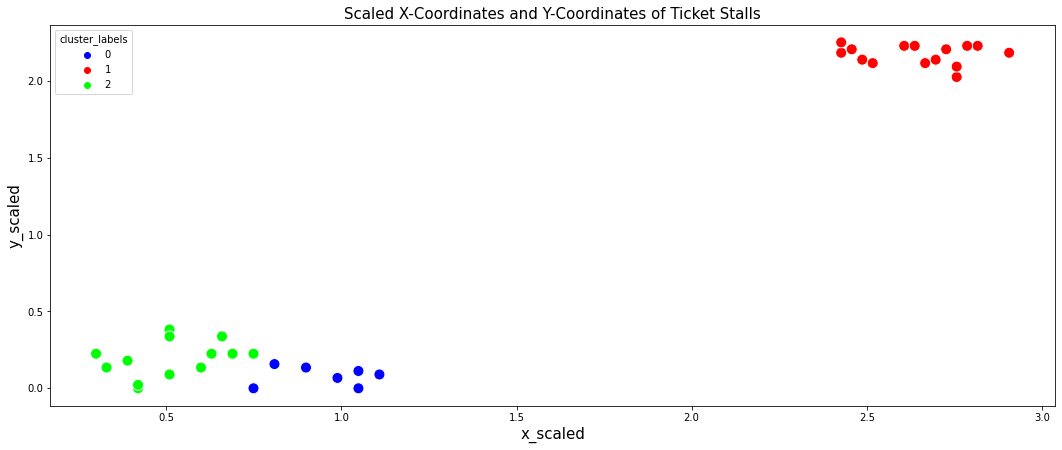

In [6]:
# Plot Clusters
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled",
                y = "y_scaled",
                hue = "cluster_labels",
                data = df,
                palette = "brg",
                s = 120)
plt.title("Scaled X-Coordinates and Y-Coordinates of Ticket Stalls", size = 15)
plt.xlabel("x_scaled", size = 15)
plt.ylabel("y_scaled", size = 15)
plt.show()

### Identify Number of Clusters with Elbow Method

In [7]:
# Declaring variables for use
distortions = []

num_clusters = range(1, 7)

# Population distortions for various clusters
for i in num_clusters:
    centroids, distortion = kmeans(df[["x_scaled", "y_scaled"]], i)
    distortions.append(distortion)

**Elbow Method to Find Best Number of Clusters**

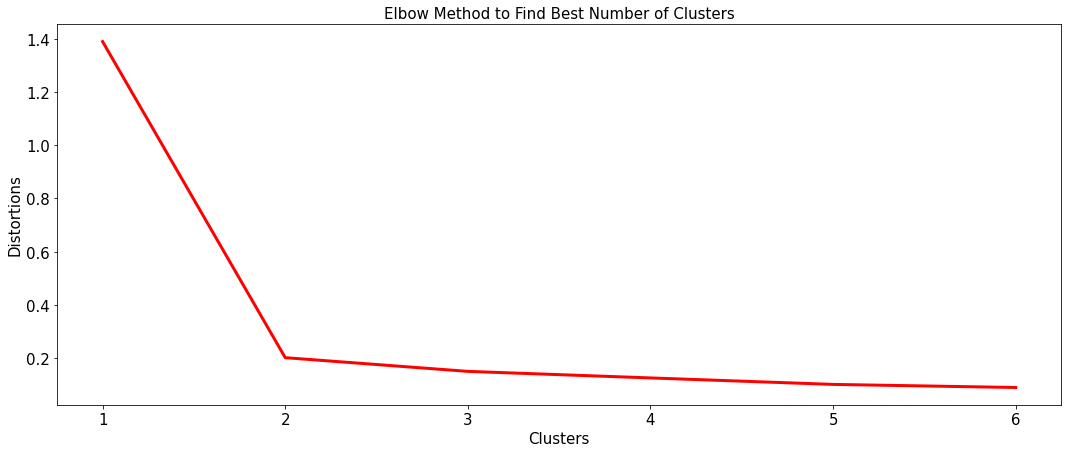

In [8]:
elbow_data = pd.DataFrame({"num_clusters": num_clusters,
                     "distortions": distortions})

plt.figure(figsize = (18, 7))
sns.lineplot(x = "num_clusters",
             y = "distortions",
             data = elbow_data,
             color = "red",
             linewidth = 3)
plt.title("Elbow Method to Find Best Number of Clusters", size = 15)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Distortions", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Use 2 Clusters**

In [9]:
# Generate Cluster Centers
cluster_centers, distortions = kmeans(df[["x_scaled", "y_scaled"]], 2)

# Generate Cluster Labels
df["cluster_labels"], _ = vq(df[["x_scaled", "y_scaled"]], cluster_centers)

**Plot Clusters**

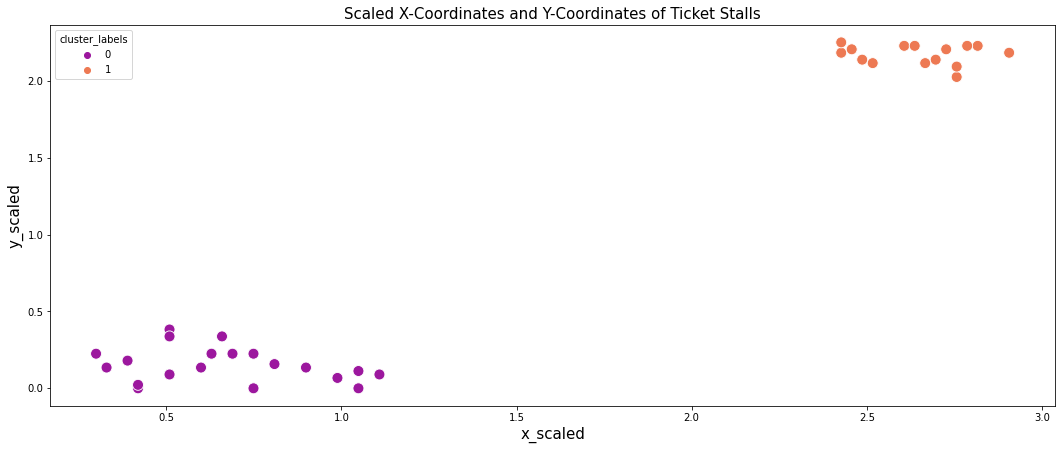

In [10]:
# Plot Clusters
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled",
                y = "y_scaled",
                hue = "cluster_labels",
                data = df,
                palette = "plasma",
                s = 120)
plt.title("Scaled X-Coordinates and Y-Coordinates of Ticket Stalls", size = 15)
plt.xlabel("x_scaled", size = 15)
plt.ylabel("y_scaled", size = 15)
plt.show()

### Import Mouse Dataset

In [14]:
df = pd.read_csv("mouse.csv")
df[:3]

,x_coordinate,y_coordinate,mouse_part
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head


**Normalization of x and y coordinates**

In [15]:
# Normalization of x and y coordinates
scaled_df = whiten(df[["x_coordinate", "y_coordinate"]])
scaled_df = pd.DataFrame(scaled_df)

# Concatenation 
df = pd.concat([df, scaled_df], axis = 1)
df = df.rename(columns = {0: "x_scaled",
                          1: "y_scaled"})

# Display
df = df[["x_coordinate", "y_coordinate", "x_scaled", "y_scaled", "mouse_part"]]
df[:3]

,x_coordinate,y_coordinate,x_scaled,y_scaled,mouse_part
0,0.456601,0.432806,2.383450,2.761898,Head
1,0.611378,0.528625,3.191383,3.373349,Head
2,0.450299,0.711606,2.350551,4.541022,Head


**Plot X-Coordinates and Y-Coordinates of Mouse**

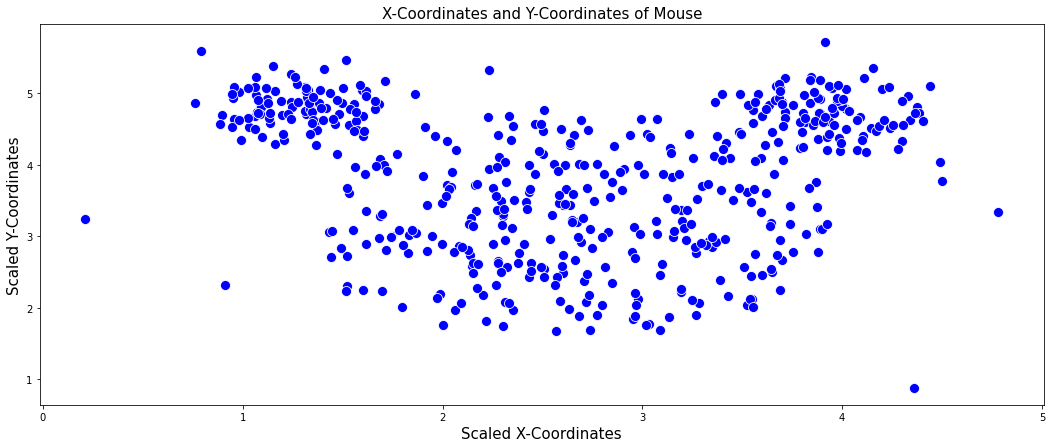

In [17]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled", 
                y = "y_scaled", 
                data = df, 
                s = 100, 
                color = "blue")
plt.title("X-Coordinates and Y-Coordinates of Mouse", size = 15)
plt.xlabel("Scaled X-Coordinates", size = 15)
plt.ylabel("Scaled Y-Coordinates", size = 15)
plt.show()

**Generate Cluster Centers and Labels**

In [55]:
# Cluster Centers
cluster_labels, distortion = kmeans(df[["x_scaled", "y_scaled"]], 4)

# Cluster Labels
df["cluster_labels"], _ = vq(df[["x_scaled", "y_scaled"]], cluster_labels)

**Plot Clusters of Mouse Parts**

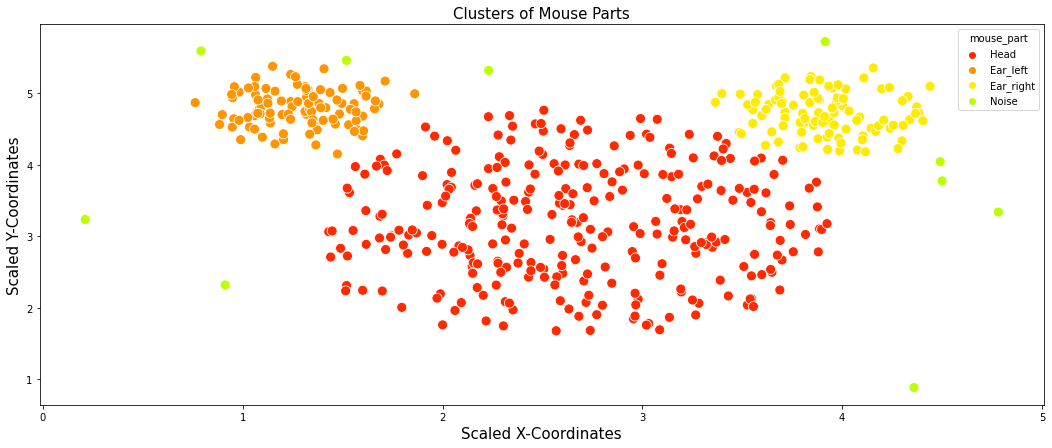

In [57]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x_scaled",
                y = "y_scaled",
                hue = "mouse_part",
                data = df,
                palette = "prism",
                s = 100)
plt.title("Clusters of Mouse Parts", size = 15)
plt.xlabel("Scaled X-Coordinates", size = 15)
plt.ylabel("Scaled Y-Coordinates", size = 15)
plt.show()

### Import Fifa Dataset

In [71]:
df = pd.read_csv("fifa_18_sample_data.csv")
df[:3]

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False


### Clustering based on Defense and Physics of Data

In [95]:
df = df[["def", "phy"]]
df[:3]

,def,phy
0,33,80
1,26,61
2,30,60


**Normalization of Features**

In [96]:
scaled_df = whiten(df)

scaled_df = pd.DataFrame(scaled_df)

scaled_df.columns = ["Defense", "Physics"]
scaled_df[:3]

,Defense,Physics
0,1.649258,9.374085
1,1.299416,7.147740
2,1.499326,7.030564


**Plotting Scaled Defense and Scaled Physics**

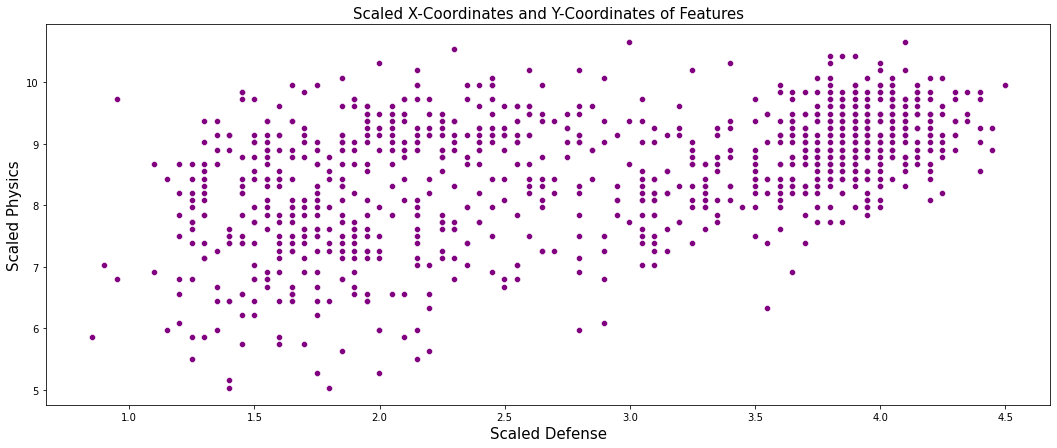

In [97]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Defense",
                y = "Physics",
                data = scaled_df,
                color = "purple")
plt.title("Scaled X-Coordinates and Y-Coordinates of Features", size = 15)
plt.xlabel("Scaled Defense", size = 15)
plt.ylabel("Scaled Physics", size = 15)
plt.show()

**Find Best Number of Clusters**

In [98]:
distortions = []
clusters = range(1, 7)
for i in clusters:
    cluster_centers, distortion = kmeans(scaled_df[["Defense", "Physics"]], i)
    distortions.append(distortion)

**Elbow Method**

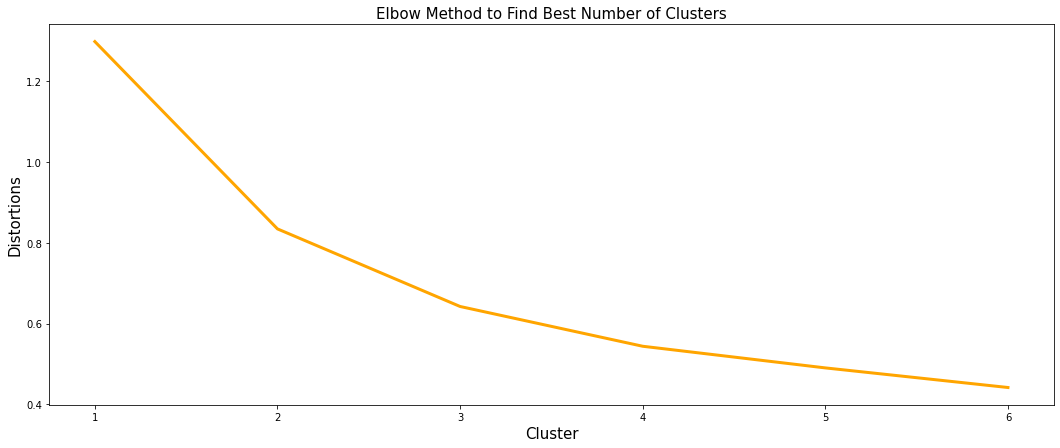

In [99]:
elbow = pd.DataFrame({"Cluster": clusters,
                      "Distortions": distortions})

plt.figure(figsize = (18, 7))
sns.lineplot(x = "Cluster",
             y = "Distortions",
             data = elbow,
             color = "orange",
             linewidth = 3)
plt.title("Elbow Method to Find Best Number of Clusters", size = 15)
plt.xlabel("Cluster", size = 15)
plt.ylabel("Distortions", size = 15)
plt.show()

**Use 2 Clusters**

In [104]:
# Generate Cluster Centers
cluster_centers, distortions = kmeans(scaled_df[["Defense", "Physics"]], 2)

# Generate Cluster Labels
scaled_df["cluster_labels"], _ = vq(scaled_df[["Defense", "Physics"]], cluster_centers)

**Plot Clusters**

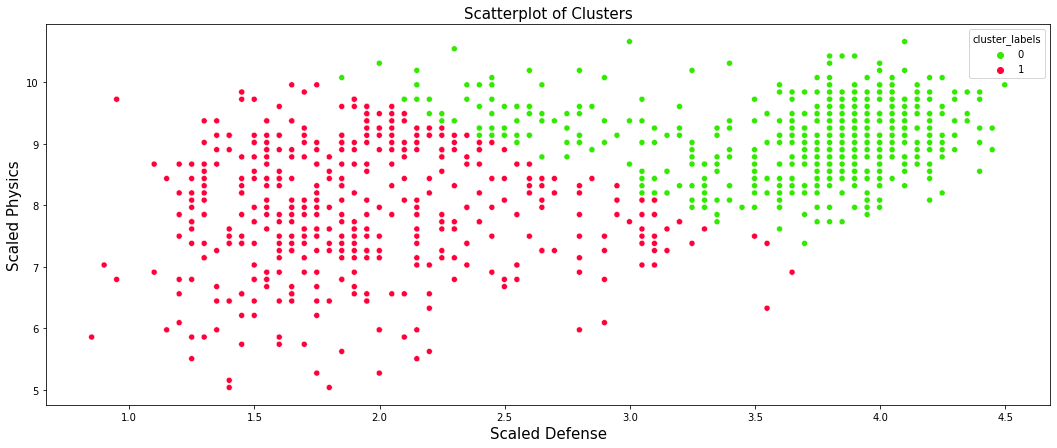

In [109]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "Defense",
                y = "Physics",
                hue = "cluster_labels",
                data = scaled_df,
                palette = "prism")
plt.title("Scatterplot of Clusters", size = 15)
plt.xlabel("Scaled Defense", size = 15)
plt.ylabel("Scaled Physics", size = 15)
plt.show()